# Analysis of dna dataset

In [55]:
library(entropy)
source("lda.R")

### How close is distribution of classes between the training and testing datasets?

In [56]:
for (i in 0:19) {
 dfs <- read_wlws(800, "waveform", i)
 v1 <- table(dfs$train$class_id)
 v2 <- table(dfs$test$class_id)
 v <- as.matrix(v1/sum(v1) - v2/sum(v2) )
 print(norm(v, "F"))
 print(KL.plugin(v1, v2))
}

[1] "unzips/n800/waveform.scale-0"
[1] 0.01470119
[1] 0.0003255412
[1] "unzips/n800/waveform.scale-1"
[1] 0.06080193
[1] 0.005671125
[1] "unzips/n800/waveform.scale-2"
[1] 0.07326237
[1] 0.008110612
[1] "unzips/n800/waveform.scale-3"
[1] 0.03271659
[1] 0.001655295
[1] "unzips/n800/waveform.scale-4"
[1] 0.02794861
[1] 0.001193622
[1] "unzips/n800/waveform.scale-5"
[1] 0.01182688
[1] 0.0002095248
[1] "unzips/n800/waveform.scale-6"
[1] 0.03855678
[1] 0.002281812
[1] "unzips/n800/waveform.scale-7"
[1] 0.007062223
[1] 7.441874e-05
[1] "unzips/n800/waveform.scale-8"
[1] 0.02615578
[1] 0.001016165
[1] "unzips/n800/waveform.scale-9"
[1] 0.03950158
[1] 0.002336118
[1] "unzips/n800/waveform.scale-10"
[1] 0.01255488
[1] 0.0002343277
[1] "unzips/n800/waveform.scale-11"
[1] 0.05404975
[1] 0.00439668
[1] "unzips/n800/waveform.scale-12"
[1] 0.07183401
[1] 0.007710808
[1] "unzips/n800/waveform.scale-13"
[1] 0.03633868
[1] 0.001982432
[1] "unzips/n800/waveform.scale-14"
[1] 0.03738148
[1] 0.002069944
[

In [57]:
dfs <- read_wlws(800, "waveform", 7)

[1] "unzips/n800/waveform.scale-7"


In [58]:
lda_multi(dfs)$multi

n,K,method,correct,dataset,run
<dbl>,<int>,<chr>,<int>,<chr>,<dbl>
800,3,normal,849,waveform,7
800,3,radial,852,waveform,7
800,3,wlw2,852,waveform,7
800,3,oracle,852,waveform,7


In [59]:
W <- gen_W(qL = 3, n = 1000)

In [60]:
bcp <- get_bcp(dfs = dfs, 1,2,3)

### Crossvalidation of best ensemble (1,2,3)

In [61]:
r1 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "acc")
r1 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
847.3


In [62]:
r2 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "brier")
r2 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
847.9


In [63]:
r3 <- cv_stack(bcp = select_bcp(bcp, 1:3), W = W, score = "log")
r3 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
845.85


In [64]:
r1 |> group_by(best_w) |> summarize(m = n())  |> arrange(desc(m))

best_w,m
<int>,<int>
564,18
885,9
329,7
220,4
248,3
68,2
695,2
712,2
790,2


In [65]:
ac <- apply(eval_scores(select_bcp(bcp, 1:3), W = W, score = "acc")$scores, 2, mean)

In [66]:
max(ac)

[1] 0.856

In [67]:
ac[c(810, 902, 897, 625, 373, 72, 123)]

[1] 0.850 0.849 0.849 0.851 0.845 0.844 0.851

In [68]:
which.max(ac)

[1] 564

In [69]:
W[810,]

[1] 0.47 0.22 0.31

In [70]:
r3 |> group_by(best_w) |> summarize(m = n())  |> arrange(desc(m))

best_w,m
<int>,<int>
28,5
36,3
716,3
985,3
17,2
29,2
98,2
371,2
521,2


In [71]:
ac[c(112,960,585, 353,58,7,8)]

[1] 0.849 0.850 0.848 0.853 0.837 0.849 0.835

### Crossvalidation of best ensemble (1,2,4)

In [72]:
r4 <- cv_stack(bcp = select_bcp(bcp, c(1,2,4)), W = W, score = "acc")
r4 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
851.15


### Crossvalidation of best ensemble (1,3,4)

In [73]:
r5 <- cv_stack(bcp = select_bcp(bcp, c(1,3,4)), W = W, score = "acc")
r5 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
845.45


In [74]:
r6 <- cv_stack(bcp = select_bcp(bcp, c(1,3,4)), W = W, score = "acc")
r6 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
844.25


### Crossvalidation of best ensemble (2,3,4)

In [75]:
r7 <- cv_stack(bcp = select_bcp(bcp, c(2,3,4)), W = W, score = "acc")
r7 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

[1] 1000 1000


mean(m)
<dbl>
848.4


### Crossvalidation of best ensemble (1,2)

In [76]:
W1 <- matrix(seq(0,1, length.out = 51), ncol = 2, nrow = 51, byrow=F)
W1[,2] = 1 - W1[,1]

In [77]:
r8 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "acc")

[1] 1000   51


In [78]:
r8 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

# A tibble: 20 × 2
  best_w     m
   <int> <int>
1      3    29
2      5    13
3     45    11
4      1     7
5      2     7
# ℹ 15 more rows


In [79]:
r9 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "brier")
r9 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

[1] 1000   51
# A tibble: 35 × 2
  best_w     m
   <int> <int>
1     13     8
2     16     6
3     18     6
4      2     5
5     22     5
# ℹ 30 more rows


In [80]:
r10 <- cv_stack(bcp = select_bcp(bcp, 1:2), W = W1, score = "log")
r10 |> group_by(best_w) |> summarize(m=n()) |> arrange(desc(m)) |> print(n = 5)

[1] 1000   51
# A tibble: 35 × 2
  best_w     m
   <int> <int>
1     12     9
2      3     6
3      8     5
4     23     5
5     29     5
# ℹ 30 more rows


In [81]:
ac1 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "acc")$scores, 2, mean)

In [82]:
which.max(ac1)
max(ac1)
min(ac1)
which.min(ac1)
W1[1,]

[1] 3

[1] 0.856

[1] 0.846

[1] 22

[1] 0 1

In [83]:
ac1[c(13,46,19,27,33)]

[1] 0.852 0.852 0.848 0.850 0.850

In [84]:
W1[c(22,24,31),]

0.42,0.58
0.46,0.54
0.60,0.40


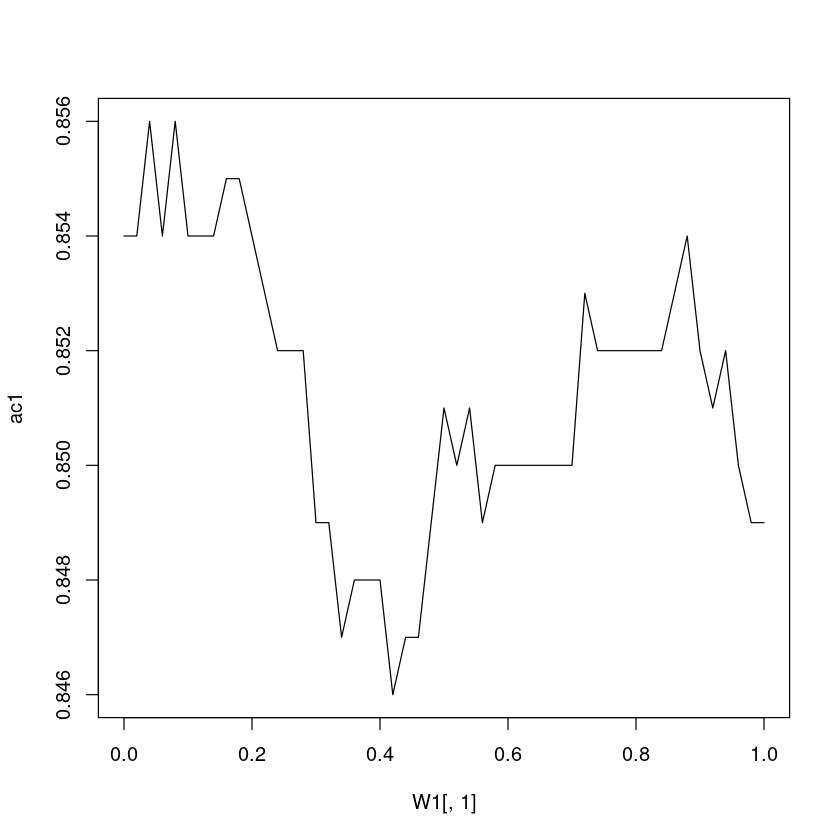

In [85]:
plot(W1[,1], ac1, type = "l")

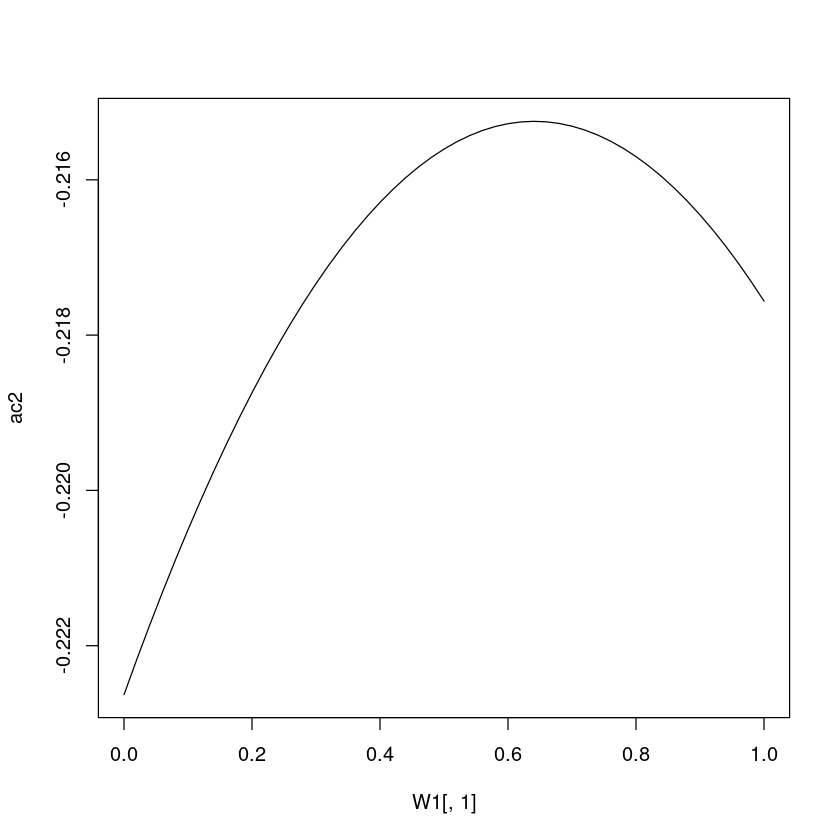

In [86]:
ac2 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "brier")$scores, 2, mean)
plot(W1[,1], ac2, type = "l")

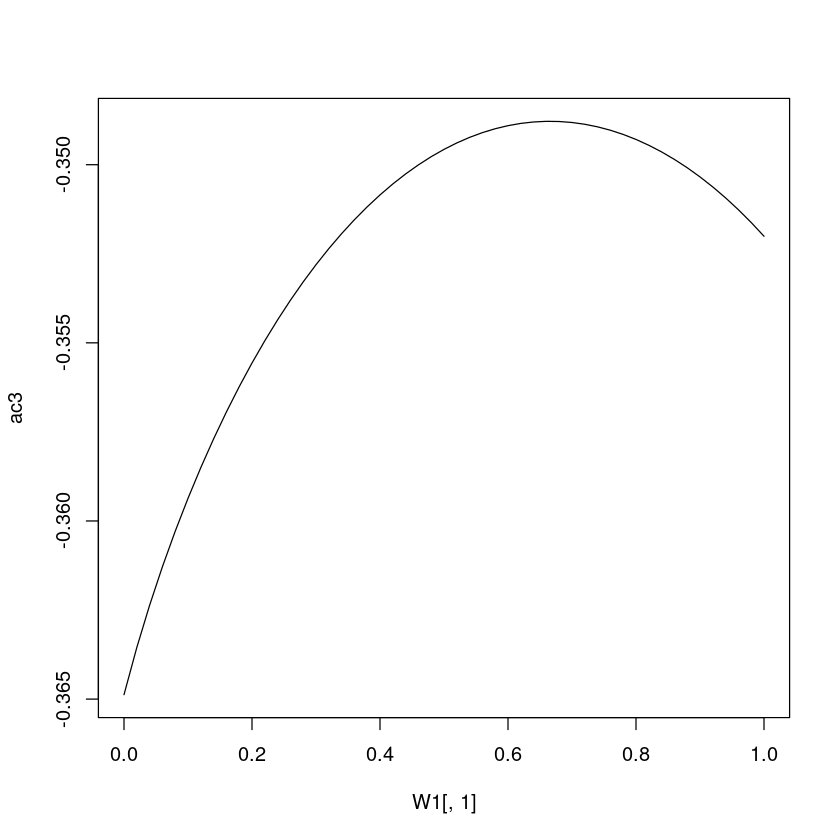

In [87]:
ac3 <- apply(eval_scores(select_bcp(bcp, 1:2), W = W1, score = "log")$scores, 2, mean)
plot(W1[,1], ac3, type = "l")

In [88]:
r8 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
849.4


In [89]:
r9 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
850.15


In [90]:
r10 |> group_by(rep) |> summarize(m = sum(correct2)) |> summarize(mean(m))

mean(m)
<dbl>
851.95
